In [1]:
from IPython.display import display, HTML 
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
 """))

In [3]:
import numpy as np
import pandas as pd                              # 결측치 체크
import sys
from tensorflow.keras import utils               # utils.to_categorical
from tensorflow.keras.models import Sequential   # 모델 만들기
from tensorflow.keras.layers import Dense, Input
from matplotlib import pyplot as plt

# 로지스틱 회귀분석(이진분류)
## 1. 데이터셋 생성 & 전처리 

In [ ]:
df = pd.read_csv('data/pima-indians-diabetes.csv', 
             comment='#',
             header=None)
df.info() # 결측치 없음

In [ ]:
# 타겟 변수의 균형 
df.iloc[:,-1].value_counts() #df.loc[8]

In [ ]:
df.head()
# X_data=df.iloc[:,-1]

In [ ]:
# csv 파일을 numpy배열로 바로 읽어오기 : np.loadtxt(결측치가 없는 경우), np.genfromtxt(결측치가 있을 경우)
dataset = np.loadtxt('data/pima-indians-diabetes.csv',
                     encoding='utf-8',
                     delimiter=',')
dataset.shape  # 독립변수 8개, 종속변수 1개

In [ ]:
# 데이터 분할 : 학습데이터셋(모델학습용) + 시험데이터셋(모델평가용)
X_train = dataset[:700, :-1]
y_train = dataset[:700, -1]
X_test = dataset[700: , :-1]
y_test = dataset[700: , -1]
X_train.shape , y_train.shape, X_test.shape, y_test.shape

## 2. 모델 구성

In [ ]:
# 8 -> 32 -> 16 -> 1
#input layer, hidden layer, ouput layer

In [ ]:
# 모델 구성
model = Sequential() # 모델객체 생성
model.add(Input(shape=(8,)))
model.add(Dense(units=32, activation='relu')) # 딥러닝 DNN
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()
# 8*32+32 = 288 / 32*16+16=528 / 16*1+1=17

## 3. 학습과정 설정
- 뒷값(파라미터) 부터 (역전파) 조종 

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy']) # 리스트에 넣어야 함 ,성능 평가(Evaluate)- 정확도(accuracy), 손실(loss), 정밀도(precision), 재현율(recall)

## 4. 학습

In [ ]:
%%time
hist = model.fit(X_train, y_train,                     # 훈련 데이터
                epochs=200,                            # 학습 횟수
                batch_size=350 ,                       # 한번에 읽어들이는 데이터양(나눠서 학습하는 것)
                # validation_data=[X_test, y_test]),   # 검증데이터 (train 데이터랑 다른 값)
                # validation_split=0.2,                  # 검증데이터 설정을 컴퓨터가 알아서 해줌 (훈련데이터중에)validation_(data or split 둘중에 하나 사용 ) 
                verbose=0                              # 학습 로그 출력 여부 (0:출력X,1:출력O,2:자세히 출력)
                  )

## 5. 모델 평가하기(학습과정 보기, 평가,혼동행렬)
- 학습과정 설정에서 사용한것만 평가 가능
    - loss='binary_crossentropy, metrics='binary_accuracy'

In [ ]:
hist.history.keys()
# val_loss, val_binary_accuracy = validation_split=0.2에서 자동추출됨

In [ ]:
# 학습과정 표시 (train data (학습데이터)에 대한 loss와 accuracy)
fig, loss_ax = plt.subplots(figsize=(8,4)) #fig는 임시변수 x축을 할당하기위해 loss_ax
loss_ax.plot(hist.history['loss'], 'r')
acc_ax = loss_ax.twinx()                  # loss_ax와 x 축을 공유하는 acc_ax
acc_ax.plot(hist.history.get('binary_accuracy'), 'b')

In [ ]:
# 모델 평가(X) : 트레인 데이터로 하면 하나마나 잘 나옴
model.evaluate(X_train, y_train)

In [ ]:
# 모델 평가(O) : 테스트하려고 만든데이터로 해야 함
model.evaluate(X_test, y_test)

### 혼동행렬
- 테스트 데이터 셋의 실제값과 예측값으로 작성된 교차표
    - TP(True Positive)  : 정답 -> 병이 있는 환자를 맞춤
    - TN(True Negative)  : 정답 -> 건강한 사람을 맞춤
    - FP(False Positive) : 틀림 -> 건강한 사람을 환자로 잘못 판단
    - FN(False Negative) : 틀림 -> 환자를 건강하다고 잘못 판단
- accuracy(정확도) : (TN+TP)/(TN+FP+FN+TP) : 전체 사람중 환자,정상인만 맞춘 비율 \
    <span style="color:red; font-weight:bold; font-size:15px;">:전체 예측 결과-전체중 맞춘 비율 <span>
- precision(정밀도) : TP/ (FP+TP)   : 예측값기준(환자라고 예측한 사람들중 실제 환자인 비율)\
    <span style="color:red; font-weight:bold; font-size:15px;">:예측이 양성인 것들 기준-예측을 믿을 수 있는지(양성 예측 정확성)<span>\
    -precision을 높이기 위해서는 확실한것만 Positive로 예측
- recall(재현율) : TP/(FN+TP) : 실제값기준(실제로 환자인 사람들 중에서, 모델이 얼마나 잘 찾아냈는지)\
    <span style="color:red; font-weight:bold; font-size:15px;">:실제 양성인 것들 기준-얼마나 잘 놓치지않고 찾아냈는지?(민감도)<span>\
    -recall을 높이려면 조금이라도 가능성이 있으면 Positive로 예측 
- f1 score = recall과 precision의 조화평균 
            precision*recall
        2*―――――――――――――――――――――
            precision+recall
        
        
- Precision ↑ → Recall ↓
- Recall ↑ →  Precision ↓

In [ ]:
y_test[:5]

In [ ]:
# 실제값 : y_test (68개)
# 예측값 : 
y_hat = (model.predict(X_test)>=0.5).astype(float)   
# model.predict(X_test) : X_test에 대한 예측 1일 확률을 찾아서 
# 0.5 이상이면 1(True), 이하면 0(false)로 판단
# astype(float) : 출력된 값의 true,false를 1.0,0,0 숫자로 변경
y_hat[:5]

In [ ]:
y_hat.reshape(-1)

In [ ]:
# 실제값을 예측했을 때 
TN = 0 # 0을 0으로 예측한 경우의 수 (T)
FP = 0 # 0을 1로 예측한 경우 (틀린경우)(F)
FN = 0 # 1을 0으로 잘못 예측한 경우 (F)
TP = 0 # 1을 1로 예측한 경우의 수 (T) 
print(y_test.shape,y_hat.shape)
for y,h in zip(y_test,y_hat.reshape(-1)):   # y_hat이 (68,1)로 1차원으로 만들기위해 reshape함
    if y==0 and h==0:
        TN += 1
    elif y==0 and h==1:
        FP += 1
    elif y==1 and h==0:
        FN += 1
    else:
        TP += 1
print(TN,FP)
print(FN,TP)


In [ ]:
# 교차표
ctab = pd.crosstab(y_test,              # 실제값 (1차원으로 넣기)
                   y_hat.reshape(-1))   # 예측값 (1차원으로 넣기)
ctab.index.name='실제값'
ctab.columns.name='예측값'
ctab
pd.crosstab(y_test,            # 실제값
            y_hat.reshape(-1), # 예측값
            rownames=['실제값'],
            colnames=['예측값'])

In [ ]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,
                 y_hat.reshape(-1))

In [ ]:
# accuracy
print('accuracy(정확도) :',(TN+TP)/ (TN+FP+FN+TP)) # 0.6764705777168274
print('recall(재현율) :', ((TP)/(FN+TP)))
print('precision(정밀도) :', ((TP)/(FP+TP))) 

 ## 6. 모델 사용

In [ ]:
X_test[0]

In [ ]:
int(model.predict(np.array([X_test[0]]))>=0.5)

In [ ]:
# 로지스티 회귀분석 (0과 1만 나옴) 이진분류분석 예측 코드 
(model.predict([[2,122,76,27,200,35.9,0.483,26],
               [0,122,76,27,200,35.9,0.483,26]])).astype(int)

# 분류분석
1. 데이터셋 생성 및 전처리 : 훈련셋(600개), 검증셋(100개), 테스트셋(68개)
2. 모델 생성(input8, output2) : 출력층 softmax(출력합을 1(100%)로 만듬) 
    * model.summary() 파라미터 수와 메모리 확인 작업 필수
3. 모델 학습과정 설정 : loss="categorical_crossentropy",metrics=['accuracy'(평가지표)]
4. 모델 학습 : 훈련셋과 검증셋으로 훈련
5. 모델 평가 : 그래프 (hist.history) : 훈련셋,검증셋의 loss,accuracy 4개의 그래프, 평가(테스트셋), 교차표(테스트셋)
6. 모델 저장 및 사용 : predict 결과에 argmax() \
    [99.2,0.8]
    * 최대값이 있는 index 구하기

## 1. 데이터 셋 생성 및 전처리

In [4]:
dataset = np.loadtxt('data/pima-indians-diabetes.csv', 
                     encoding='utf-8',
                     delimiter=',')
dataset.shape

(768, 9)

In [5]:
# 훈련셋(600개), 검증셋(100개), 테스트셋(68개)
# 분류분석을 하려면 타겟변수는 원핫인코딩 필수로 해야 함. 0일 확률이 몇퍼센트인지, 1인확률이 몇퍼센트인지 

#훈련셋
X_train = dataset[:600,:-1] 
y_train = dataset[:600,-1]    # [:600,-1:]로 하면 2차원

# 검증셋
X_val = dataset[600:700,:-1]
y_val = dataset[600:700,-1]

# 테스트셋
X_test = dataset[700:,:-1]
y_test = dataset[700:,-1]
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape


((600, 8), (600,), (100, 8), (100,), (68, 8), (68,))

In [6]:
print(y_train[:5])

[1. 0. 1. 0. 1.]


In [7]:
# 타겟 변수의 원핫인코딩 분류분석
print(utils.to_categorical(y_train[:5]))
Y_train = utils.to_categorical(y_train)

Y_val = utils.to_categorical(y_val)
Y_test = utils.to_categorical(y_test)
Y_train.shape, y_train.shape, Y_val.shape,y_val.shape, Y_test.shape,y_test.shape

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


((600, 2), (600,), (100, 2), (100,), (68, 2), (68,))

## 2. 모델 생성(input8, target2)
- 과적합을 줄이는 단계 추가 (dropout 추가)


In [24]:
from tensorflow.keras.layers import Dropout
# 원래 있는 파라미터중에 랜덤으로 제거

# 모델 구성
model = Sequential() # 모델객체 생성
model.add(Input(shape=(8,)))
model.add(Dense(units=32, activation='relu')) # 딥러닝 DNN
model.add(Dropout(0.2)) # 과적합을 해결 (8*32+32=288개중에 20%)
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.1)) # 과적합을 해결 (32*64+64=2112개중에 10%)
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.2)) # 과적합을 해결 (64*16+16=1040개중에 20%)
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=2, activation='softmax'))
model.summary()
# 8*32+32 = 288 / 32*64+64=2112 / 64*16+16=1040 / 16*8+8=136 / 8*2+2=18

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 32)                288       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                1040      
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 8)                

## 3.학습과정 설정

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

## 4. 모델 학습

In [26]:
%%time
hist = model.fit(X_train,Y_train,
                 epochs=300,
                 validation_data=(X_val,Y_val),
                 verbose=1)

Epoch 1/300
19/19 [==============================] - 1s 12ms/step - loss: 7.6891 - accuracy: 0.5150 - val_loss: 2.8372 - val_accuracy: 0.6000
Epoch 2/300
19/19 [==============================] - 0s 4ms/step - loss: 3.5441 - accuracy: 0.4817 - val_loss: 0.9986 - val_accuracy: 0.6700
Epoch 3/300
19/19 [==============================] - 0s 4ms/step - loss: 1.5935 - accuracy: 0.5467 - val_loss: 0.6864 - val_accuracy: 0.6700
Epoch 4/300
19/19 [==============================] - 0s 4ms/step - loss: 0.8966 - accuracy: 0.6117 - val_loss: 0.6614 - val_accuracy: 0.6700
Epoch 5/300
19/19 [==============================] - 0s 3ms/step - loss: 0.8095 - accuracy: 0.5917 - val_loss: 0.6656 - val_accuracy: 0.6700
Epoch 6/300
19/19 [==============================] - 0s 3ms/step - loss: 0.7600 - accuracy: 0.6183 - val_loss: 0.6586 - val_accuracy: 0.6700
Epoch 7/300
19/19 [==============================] - 0s 4ms/step - loss: 0.7627 - accuracy: 0.6050 - val_loss: 0.6618 - val_accuracy: 0.6700
Epoch 8/300


Epoch 59/300
19/19 [==============================] - 0s 3ms/step - loss: 0.6354 - accuracy: 0.6717 - val_loss: 0.6187 - val_accuracy: 0.6700
Epoch 60/300
19/19 [==============================] - 0s 3ms/step - loss: 0.6416 - accuracy: 0.6517 - val_loss: 0.6012 - val_accuracy: 0.6800
Epoch 61/300
19/19 [==============================] - 0s 4ms/step - loss: 0.6269 - accuracy: 0.6900 - val_loss: 0.5952 - val_accuracy: 0.7000
Epoch 62/300
19/19 [==============================] - 0s 3ms/step - loss: 0.6334 - accuracy: 0.6583 - val_loss: 0.5967 - val_accuracy: 0.6800
Epoch 63/300
19/19 [==============================] - 0s 4ms/step - loss: 0.6333 - accuracy: 0.6533 - val_loss: 0.5916 - val_accuracy: 0.7200
Epoch 64/300
19/19 [==============================] - 0s 3ms/step - loss: 0.6439 - accuracy: 0.6733 - val_loss: 0.5985 - val_accuracy: 0.6800
Epoch 65/300
19/19 [==============================] - 0s 3ms/step - loss: 0.6141 - accuracy: 0.6900 - val_loss: 0.6094 - val_accuracy: 0.6700
Epoch 

19/19 [==============================] - 0s 3ms/step - loss: 0.5545 - accuracy: 0.7317 - val_loss: 0.5431 - val_accuracy: 0.7400
Epoch 174/300
19/19 [==============================] - 0s 4ms/step - loss: 0.5604 - accuracy: 0.7267 - val_loss: 0.5700 - val_accuracy: 0.7000
Epoch 175/300
19/19 [==============================] - 0s 4ms/step - loss: 0.5638 - accuracy: 0.7100 - val_loss: 0.5810 - val_accuracy: 0.6900
Epoch 176/300
19/19 [==============================] - 0s 4ms/step - loss: 0.5575 - accuracy: 0.7267 - val_loss: 0.5943 - val_accuracy: 0.6800
Epoch 177/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5394 - accuracy: 0.7350 - val_loss: 0.5776 - val_accuracy: 0.7000
Epoch 178/300
19/19 [==============================] - 0s 4ms/step - loss: 0.5799 - accuracy: 0.6917 - val_loss: 0.5443 - val_accuracy: 0.7300
Epoch 179/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5738 - accuracy: 0.6983 - val_loss: 0.5635 - val_accuracy: 0.7000
Epoch 180/300

19/19 [==============================] - 0s 4ms/step - loss: 0.5211 - accuracy: 0.7400 - val_loss: 0.5163 - val_accuracy: 0.7300
Epoch 288/300
19/19 [==============================] - 0s 4ms/step - loss: 0.5604 - accuracy: 0.7200 - val_loss: 0.5739 - val_accuracy: 0.6900
Epoch 289/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5203 - accuracy: 0.7550 - val_loss: 0.5710 - val_accuracy: 0.7000
Epoch 290/300
19/19 [==============================] - 0s 3ms/step - loss: 0.5234 - accuracy: 0.7300 - val_loss: 0.5614 - val_accuracy: 0.7000
Epoch 291/300
19/19 [==============================] - 0s 4ms/step - loss: 0.5269 - accuracy: 0.7433 - val_loss: 0.5580 - val_accuracy: 0.7200
Epoch 292/300
19/19 [==============================] - 0s 4ms/step - loss: 0.5173 - accuracy: 0.7533 - val_loss: 0.5507 - val_accuracy: 0.7000
Epoch 293/300
19/19 [==============================] - 0s 4ms/step - loss: 0.5201 - accuracy: 0.7550 - val_loss: 0.5490 - val_accuracy: 0.7000
Epoch 294/300

In [ ]:
# %%time
# hist = model.fit(X_train,Y_train,
#                  epochs=300,
#                  validation_data=(X_val,Y_val),
#                  verbose=1, batch_size=300)
# 이렇게 하면 600개의 데이터를 300개로 나눠서 2번이 실행되면 epochs가 1회 누적됨

## 5.학습과정 살펴보기

In [11]:
hist.history.keys() 
# 'loss', 'accuracy', 'val_loss', 'val_accuracy'

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

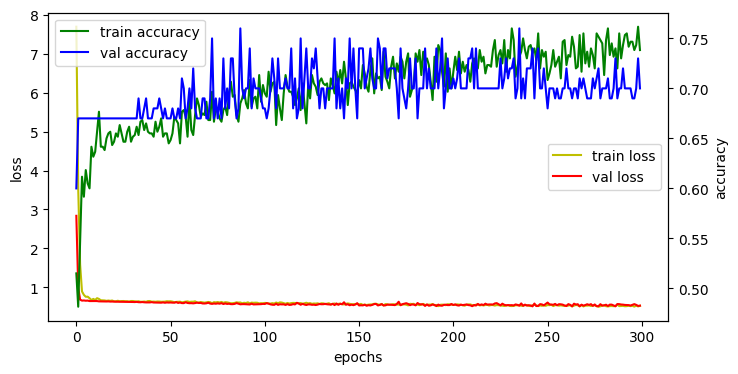

In [84]:
fig, loss_ax = plt.subplots(figsize=(8,4))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx() #loss_ax의 x축 공유
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend() # bbox_to_anchor=(0.82712,0.76)

 ## 6.모델 평가 & 교차로

In [87]:
loss, accuracy = model.evaluate(X_test,Y_test,verbose=0)
print(f'loss: {loss}, 정확도:{accuracy}')

loss: 0.6573886871337891, 정확도:0.6323529481887817


In [91]:
# 교차표 그리기 위해 y_hat 구하기
Y_test # 1차원이 아니라서 y_test로 해야함
Y_test.argmax(axis=1) #y_test가 없다면 argmax로 변경 후 진행
y_test # 실제값 

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0], dtype=int64)

In [101]:
y_hat = model.predict(X_test)
y_hat = y_hat.argmax(axis=1)
# y_hat은 0이 나올 확률 , 1이 나올 확률를 나타냄 

3/3 [==============================] - 0s 2ms/step


In [102]:
pd.crosstab(y_test,y_hat, rownames=['실제값'], colnames=['예측값'])

예측값,0,1
실제값,,
0.0,41,0
1.0,25,2


## 7. 모델 저장 및 사용

In [103]:
from tensorflow.keras.models import save_model, load_model
# model.save('model/06_pima.h5')
save_model(model, 'model/06_pima.h5')

In [104]:
modle2 = load_model('model/06_pima.h5')

In [113]:
pred = modle2.predict([[2, 122,76,27,200,35.9,0.483,26],
                [6, 125,78,31,0,27.6,0.565,49]])
pred.argmax(axis=1)

1/1 [==============================] - 0s 37ms/step


array([0, 0], dtype=int64)

In [114]:
np.argmax(pred, axis=1)

array([0, 0], dtype=int64)

In [111]:
X_test[1]

array([  6.   , 125.   ,  78.   ,  31.   ,   0.   ,  27.6  ,   0.565,
        49.   ])